# Project: Investigate the No-show appointments Dataset (orignal source on kaggle)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This section of the report, provide a brief introduction to the No-show appointments dataset I have selected to work on. 

>The No-show appointment dataset extract information from 100k medical appointment in Brazil and is focused on the question of whether or not patient shows up for their medical appointment.  A number of characteristics about the patient are explained in the variables below;

>● **ScheduledDay** tells us on what day the patient scheduled for their appointment. 

>● **Neighborhood** indicates the location of the hospital. 

>● **Scholarship** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 0 : No and 1: Yes

>● **Age** indicates the actual age of the patient in years as of when the data was collected.

>● **PatientId** indicates the patient unique identity number. Every patient has its unique patientid.

>● **Alcoholism** tells us weather the patient takes alcohol or not. 0 : No and 1: Yes

>● **Diabetes** tells us weather the patient is diabetic or not.0 : No and 1: Yes

>● **Handicap** tells us weather the patient is Handicap or not.

>● **SMS_received** tells us weather the patient recieves SMS or not. 0 : No and 1: Yes

>● **No-show** tells us if the patient showed up for their appointment or not.  With ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


>At the end of this investigation, we will be able to identify what features are important for us to know if a patient will show up for their scheduled appointment.

In [25]:
# import packages that will be used for this investigation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> click [here](https://docs.google.com/spreadsheets/d/1CiA0jMMC6JDvdkZfNLDs2YLN-ayXBmLKdhj6-58YMuA/edit?usp=sharing) to view data set used for this project thanks.

<a id='wrangling'></a>
## Data Wrangling and Data Cleaning

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [26]:
#read the csv file and show the first five rows of the data frame
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [27]:
#find the shape of the data set
df.shape

(110527, 14)

In [28]:
# check if there are missing data and also check the data type for cosistency
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataframe above shows no missing variable. this looks good, but we need to change the data types of some variables like Scholarship, Hipertension, Diabetes, Alcoholism, Handicap and, SMS_received to type object since they are categorical variables

In [29]:
#basic descriptive statistics of the numeric colunms
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [30]:
# Convert PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')

# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

# Converting scholarship, hypertension, diabetes, alcoholism, handicap, smsrecieved to datatype object

df['Scholarship'] = df['Scholarship'].astype('object')

df['Hipertension'] = df['Hipertension'].astype('object')

df['Diabetes'] = df['Diabetes'].astype('object')

df['Alcoholism'] = df['Alcoholism'].astype('object')

df['Handcap'] = df['Handcap'].astype('object')

df['SMS_received'] = df['SMS_received'].astype('object')

# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMS_Received', 'No-show': 'No_Show'})


In [31]:
# view dataframe to make sure changes made has refelected
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [32]:
# view data info to make sure changes made has reflected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null object
Hypertension      110527 non-null object
Diabetes          110527 non-null object
Alcoholism        110527 non-null object
Handicap          110527 non-null object
SMS_Received      110527 non-null object
No_Show           110527 non-null object
dtypes: datetime64[ns](2), int64(3), object(9)
memory usage: 11.8+ MB


In [33]:
# Get Day of the Week for ScheduledDay and AppointmentDay
df['ScheduledDay_DayOfWeek'] = df['ScheduledDay'].dt.weekday_name
df['AppointmentDay_DayOfWeek'] = df['AppointmentDay'].dt.weekday_name


In [34]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,ScheduledDay_DayOfWeek,AppointmentDay_DayOfWeek
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


In [35]:
# drop variables that are not needed for EDA
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], inplace = True, axis = 1)

In [36]:
print('Gender Unique values:',df.Gender.unique(), 
      '\n''\n', 'Age Unique values:', df.Age.unique(), 
      '\n''\n', 'Scholarship Unique value:', df.Scholarship.unique(),
      '\n''\n', 'Hypertension Unique values:', df.Hypertension.unique(),
     '\n''\n', 'Diabetes Unique values:', df.Diabetes.unique(),
     '\n''\n', 'Alcoholism Unique values:', df.Alcoholism.unique(),
      '\n''\n', 'Handicap Unique values:', df.Handicap.unique(),
     '\n''\n', 'SMS_Received Unique values:', df.SMS_Received.unique(),
     '\n''\n', 'No_Show Unique values:', df.No_Show.unique(),
     '\n''\n', 'ScheduledDay_DayOfWeek Unique values:', df.ScheduledDay_DayOfWeek.unique(),
     '\n''\n', 'AppointmentDay_DayOfWeek Unique values:', df.AppointmentDay_DayOfWeek.unique(),)

Gender Unique values: ['F' 'M'] 

 Age Unique values: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1] 

 Scholarship Unique value: [0 1] 

 Hypertension Unique values: [1 0] 

 Diabetes Unique values: [0 1] 

 Alcoholism Unique values: [0 1] 

 Handicap Unique values: [0 1 2 3 4] 

 SMS_Received Unique values: [0 1] 

 No_Show Unique values: ['No' 'Yes'] 

 ScheduledDay_DayOfWeek Unique values: ['Friday' 'Wednesday' 'Tuesday' 'Thursday' 'Monday' 'Saturday'] 

 AppointmentDay_DayOfWeek Unique values: ['Friday' 'Tuesday' 'Monday' 'Wednesday' 'Thursday' 'Saturday']


>In the above cell we looked at the unique values in each of the variable in the dataframe. All looks good except that in the variable Age we have an age of -1 which is not suppose to be. So we will drip the row with the age -1.

In [37]:
df = df[df.Age >= 0]
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

>At this point we are done with wrangling and cleaning the data frame. droping irrelevant columns and rows. changing data type of various columns in the data frame and performing featuring engineering to obtain two new columns in the data frame.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that I've trimmed and cleaned MY data, I'm ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that is posed in the Introduction section. 

### Research Question 1: Do Age play an important role in determining if a patient comes for a visit or not.

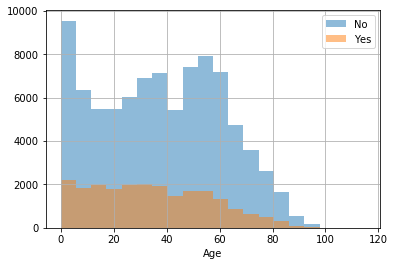

In [38]:
df[df.No_Show == 'No']['Age'].hist(alpha = 0.5, Label = 'No', bins = 20)
df[df.No_Show == 'Yes']['Age'].hist(alpha = 0.5, label = 'Yes', bins = 20)
plt.legend()
plt.xlabel('Age');

No_Show
No     37.790504
Yes    34.317667
Name: Age, dtype: float64


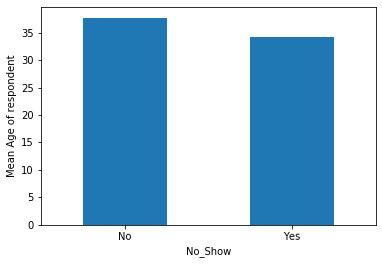

In [39]:
print(df.groupby('No_Show')['Age'].mean())

df.groupby('No_Show')['Age'].mean().plot(kind = 'bar', rot = 1)
plt.ylabel('Mean Age of respondent');

>**Remark:** From the histogram above, you can see that majority of the patient who responded to their visit to the hopistal lies between the age bracket of 0yrs to 60yrs with infant (0yrs) having the highest paid visit. The distribution begins to drop from age bracket above 60yrs. The bar chart above shows the mean age of paitient who responded to their scheduled appointment verses those who did not respond. Those who responded had a mean age of 38yrs while does who did not respond has a mean age of 34yrs. From the histrogram we can see that infants are more likely to show for their scheduled appointment and age could play a roll in determining weather a paitient who show or no show for the visit to the hospital.

### Research Question 2 : Do Gender play an important role in determining if a patient comes for a visit or not.

No_Show     No    Yes
Gender               
F        57245  14594
M        30962   7725


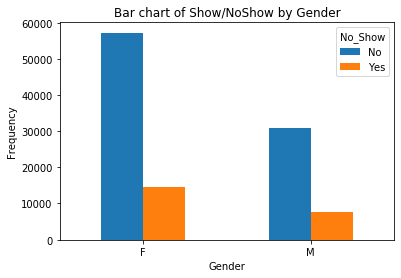

No_Show         No        Yes
Gender                       
F        51.793243  13.204133
M        28.013318   6.989306 



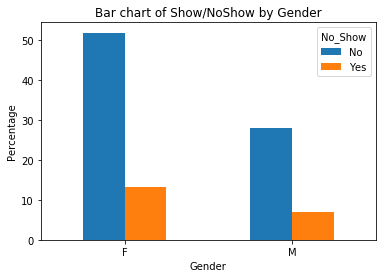

In [40]:
print(pd.crosstab(df.Gender, df.No_Show))

pd.crosstab(df.Gender, df.No_Show).plot(kind = 'bar', title = 'Bar chart of Show/NoShow by Gender', rot = 1)
plt.ylabel('Frequency')
plt.show();


crosstabgender=pd.crosstab(df.Gender, df.No_Show)
print(crosstabgender/crosstabgender.sum().sum()*100, '\n')
cr = crosstabgender/crosstabgender.sum().sum()*100
cr.plot(kind = 'bar', title = 'Bar chart of Show/NoShow by Gender', rot = 1)
plt.ylabel('Percentage')
plt.show();

>**Remark:** From the chart above we can see that female recorded more patient who came for there vist than male. Approximately 52% of the population who responded to their visit where feamle and only 28% of the population came for the vist are of gender male. This implies that Gender could play a role wether a patient shows up or not.

### Research Question 3 : Do Scholarship play an important role in determining if a patient comes for a visit or not.

No_Show         No    Yes
Scholarship              
0            79924  19741
1             8283   2578


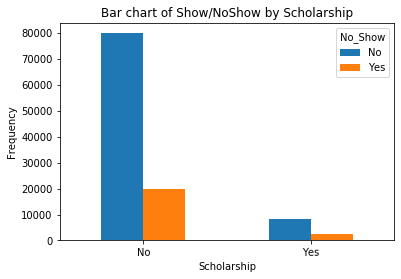

No_Show             No        Yes
Scholarship                      
0            72.312397  17.860956
1             7.494164   2.332483 



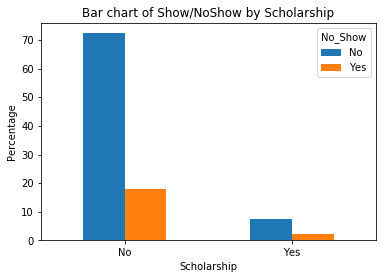

In [41]:
print(pd.crosstab(df.Scholarship, df.No_Show))

ax = pd.crosstab(df.Scholarship, df.No_Show).plot(kind = 'bar', title = 'Bar chart of Show/NoShow by Scholarship', rot = 1)
plt.ylabel('Frequency')

x_ticks_labels=['No', 'Yes']
ax.set_xticklabels(x_ticks_labels)
plt.show();

crosstabScholarship=pd.crosstab(df.Scholarship, df.No_Show)

print(crosstabScholarship/crosstabScholarship.sum().sum()*100, '\n')

cr = crosstabScholarship/crosstabScholarship.sum().sum()*100
ax = cr.plot(kind = 'bar', title = 'Bar chart of Show/NoShow by Scholarship', rot = 1)
plt.ylabel('Percentage')

x_ticks_labels=['No', 'Yes']
ax.set_xticklabels(x_ticks_labels)

plt.show();

### Research Question 4 : Do Hypertension play an important role in determining if a patient comes for a visit or not.

No_Show          No    Yes
Hypertension              
0             70178  18547
1             18029   3772


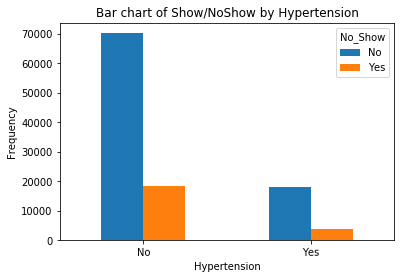

No_Show              No        Yes
Hypertension                      
0             63.494562  16.780667
1             16.311999   3.412772 



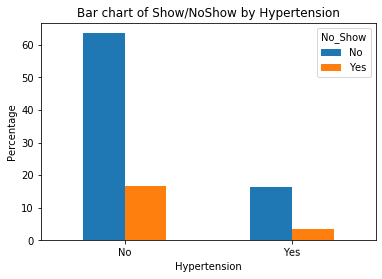

In [42]:
print(pd.crosstab(df.Hypertension, df.No_Show))

ax = pd.crosstab(df.Hypertension, df.No_Show).plot(kind = 'bar', title = 'Bar chart of Show/NoShow by Hypertension', rot = 1)
plt.ylabel('Frequency')
x_ticks_labels=['No', 'Yes']
ax.set_xticklabels(x_ticks_labels)
plt.show();

crosstabHypertension=pd.crosstab(df.Hypertension, df.No_Show)

print(crosstabHypertension/crosstabHypertension.sum().sum()*100, '\n')

cr = crosstabHypertension/crosstabHypertension.sum().sum()*100
ax = cr.plot(kind = 'bar', title = 'Bar chart of Show/NoShow by Hypertension', rot = 1)
plt.ylabel('Percentage')
x_ticks_labels=['No', 'Yes']
ax.set_xticklabels(x_ticks_labels)
plt.show();

>From the above visualization we can see that around 63% of the population do not have Hypertension and still showed up for their appointment while only 16% of the population have Hypertension and still showed up. So, Hypertension feature could help us in determining if a patient will turn up for the visit after an appointment or not.

### Research Question 5 : Do Diabetes play an important role in determining if a patient comes for a visit or not.

No_Show      No    Yes
Diabetes              
0         81694  20889
1          6513   1430


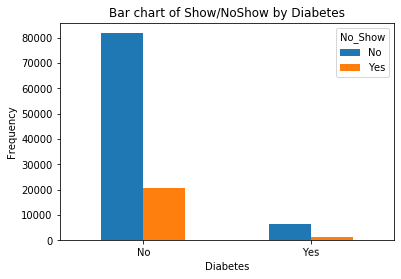

No_Show          No        Yes
Diabetes                      
0         73.913830  18.899625
1          5.892731   1.293813 



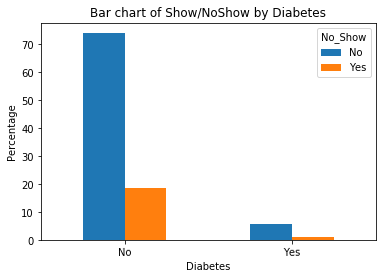

In [43]:
print(pd.crosstab(df.Diabetes, df.No_Show))

ax = pd.crosstab(df.Diabetes, df.No_Show).plot(kind = 'bar', title = 'Bar chart of Show/NoShow by Diabetes', rot = 1)
plt.ylabel('Frequency')
x_ticks_labels=['No', 'Yes']
ax.set_xticklabels(x_ticks_labels)
plt.show();

crosstabDiabetes=pd.crosstab(df.Diabetes, df.No_Show)

print(crosstabDiabetes/crosstabDiabetes.sum().sum()*100, '\n')

cr = crosstabDiabetes/crosstabDiabetes.sum().sum()*100
ax = cr.plot(kind = 'bar', title = 'Bar chart of Show/NoShow by Diabetes', rot = 1)
plt.ylabel('Percentage')
x_ticks_labels=['No', 'Yes']
ax.set_xticklabels(x_ticks_labels)
plt.show();

>**Remark:** From the above visualization we can see that around 73% of the population do not have Diabetes and still showed up for their appointment while only 6% of the population have Diabetes and still showed up. So, Diabetes feature could help us in determining if a patient will turn up for the visit after an appointment.

### Research Question 6 : Do Handicap play an important role in determining if a patient comes for a visit or not.

No_Show      No    Yes
Handicap              
0         86373  21912
1          1676    366
2           146     37
3            10      3
4             2      1


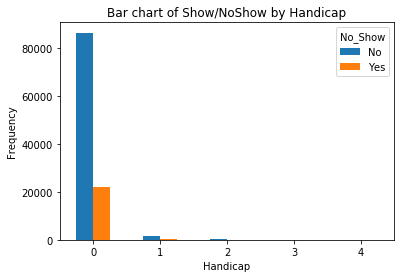

No_Show          No        Yes
Handicap                      
0         78.147223  19.825200
1          1.516385   0.331144
2          0.132096   0.033476
3          0.009048   0.002714
4          0.001810   0.000905 



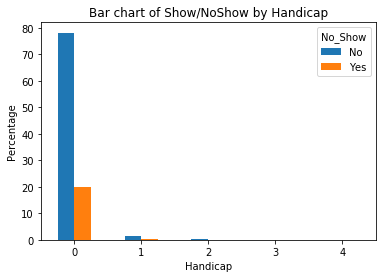

In [44]:
print(pd.crosstab(df.Handicap, df.No_Show))

pd.crosstab(df.Handicap, df.No_Show).plot(kind = 'bar', title = 'Bar chart of Show/NoShow by Handicap', rot = 1)
plt.ylabel('Frequency')
plt.show();

crosstabHandicap=pd.crosstab(df.Handicap, df.No_Show)

print(crosstabHandicap/crosstabHandicap.sum().sum()*100, '\n')

cr = crosstabHandicap/crosstabHandicap.sum().sum()*100
cr.plot(kind = 'bar', title = 'Bar chart of Show/NoShow by Handicap', rot = 1)
plt.ylabel('Percentage')
plt.show();

>**Remark:** From the above visualization we can see that around 78% of the population are not Handicap and still showed up for their appointment while only 19% of the population and still showed up. As we can see a clear distinction between different Handicap levels this feature will help us in determining if a patient will turn up for the visit or not.

### Research Question 7 : Do Alcoholism play an important role in determining if a patient comes for a visit or not.

No_Show        No    Yes
Alcoholism              
0           85524  21642
1            2683    677


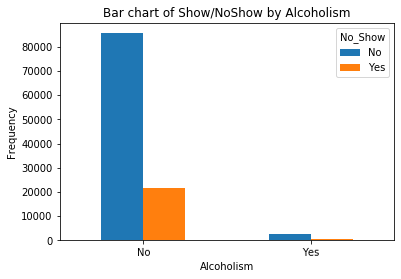

No_Show            No        Yes
Alcoholism                      
0           77.379078  19.580913
1            2.427483   0.612526 



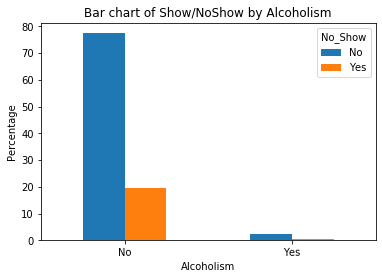

In [45]:
print(pd.crosstab(df.Alcoholism, df.No_Show))

ax = pd.crosstab(df.Alcoholism, df.No_Show).plot(kind = 'bar', title = 'Bar chart of Show/NoShow by Alcoholism', rot = 1)
plt.ylabel('Frequency')
x_ticks_labels=['No', 'Yes']
ax.set_xticklabels(x_ticks_labels)
plt.show();

crosstabAlcoholism=pd.crosstab(df.Alcoholism, df.No_Show)

print(crosstabAlcoholism/crosstabAlcoholism.sum().sum()*100, '\n')

cr = crosstabAlcoholism/crosstabAlcoholism.sum().sum()*100
ax = cr.plot(kind = 'bar', title = 'Bar chart of Show/NoShow by Alcoholism', rot = 1)
plt.ylabel('Percentage')
x_ticks_labels=['No', 'Yes']
ax.set_xticklabels(x_ticks_labels)
plt.show();

>**Remark:** From the above visualization we can see that around 77% of the population do not take Alcohol and still showed up for their appointment while only 2% of the population that do not take Alcohol showed up. So, Alcoholism feature could help us in determining if a patient will turn up for the visit after an appointment.

### Research Question 8 : Do Receiving SMS play an important role in determining if a patient comes for a visit or not.

No_Show          No    Yes
SMS_Received              
0             62509  12535
1             25698   9784


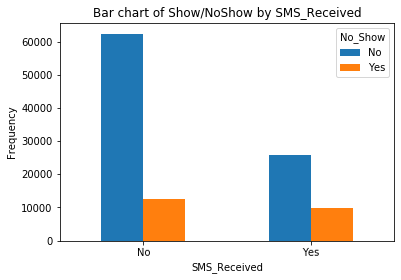

No_Show              No        Yes
SMS_Received                      
0             56.555923  11.341223
1             23.250638   8.852216 



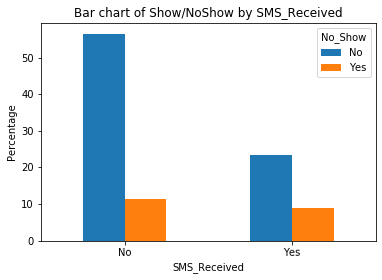

In [46]:
print(pd.crosstab(df.SMS_Received, df.No_Show))

ax = pd.crosstab(df.SMS_Received, df.No_Show).plot(kind = 'bar', title = 'Bar chart of Show/NoShow by SMS_Received', rot = 1)
plt.ylabel('Frequency')
x_ticks_labels=['No', 'Yes']
ax.set_xticklabels(x_ticks_labels)
plt.show();

crosstabSMS_Received=pd.crosstab(df.SMS_Received, df.No_Show)

print(crosstabSMS_Received/crosstabSMS_Received.sum().sum()*100, '\n')

cr = crosstabSMS_Received/crosstabSMS_Received.sum().sum()*100
ax = cr.plot(kind = 'bar', title = 'Bar chart of Show/NoShow by SMS_Received', rot = 1)
plt.ylabel('Percentage')
x_ticks_labels=['No', 'Yes']
ax.set_xticklabels(x_ticks_labels)
plt.show();

>**Remark:** From the above visualization we can see that around 56% of the population do not recieve sms but still showed up for their appointment while only 23% of the population that recieve sms did not showed up. This looks opposite to what usually happens. People who do receive a reminder SMS usually tend to visit the hospital more than those who haven't received an SMS. Or this could be an SMS that was recived while booking an appointment and could possibly have no correlation with the visit probability. So, SMS_Recieved feature could help us in determining if a patient will show up or not.

### Research Question 9 : Do ScheduledDay_DayOfWeek play an important role in determining if a patient comes for a visit or not.

No_Show                    No   Yes
ScheduledDay_DayOfWeek             
Friday                  15028  3887
Monday                  18523  4561
Saturday                   23     1
Thursday                14373  3700
Tuesday                 20877  5291
Wednesday               19383  4879


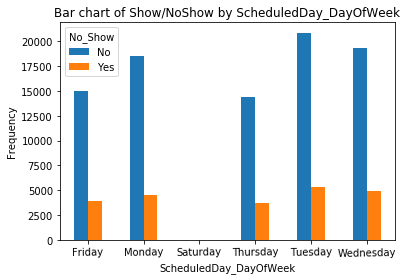

No_Show                        No       Yes
ScheduledDay_DayOfWeek                     
Friday                  13.596801  3.516820
Monday                  16.758953  4.126631
Saturday                 0.020810  0.000905
Thursday                13.004180  3.347629
Tuesday                 18.888768  4.787109
Wednesday               17.537050  4.414346 



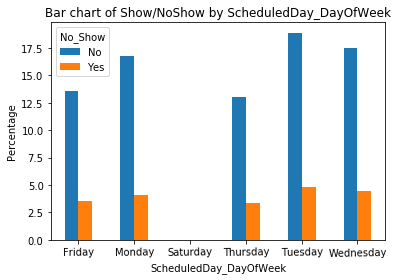

In [47]:
print(pd.crosstab(df.ScheduledDay_DayOfWeek, df.No_Show))

pd.crosstab(df.ScheduledDay_DayOfWeek, df.No_Show).plot(kind = 'bar', title = 'Bar chart of Show/NoShow by ScheduledDay_DayOfWeek', rot = 1)
plt.ylabel('Frequency')
plt.show();

crosstabScheduledDay_DayOfWeek=pd.crosstab(df.ScheduledDay_DayOfWeek, df.No_Show)

print(crosstabScheduledDay_DayOfWeek/crosstabScheduledDay_DayOfWeek.sum().sum()*100, '\n')

cr = crosstabScheduledDay_DayOfWeek/crosstabScheduledDay_DayOfWeek.sum().sum()*100
cr.plot(kind = 'bar', title = 'Bar chart of Show/NoShow by ScheduledDay_DayOfWeek', rot = 1)
plt.ylabel('Percentage')
plt.show();

> **Remark:** From the visualization above, we do not see a clear pattern in the patients visits based on the week day. But we can observe that on Saturday's the percentage of visits is zero. So, AppointmentDay_DOW may help us in predicting the visits by a small number.

### Research Question 10 : Do AppointmentDay_DayOfWeek play an important role in determining if a patient comes for a visit or not.

No_Show                      No   Yes
AppointmentDay_DayOfWeek             
Friday                    14982  4037
Monday                    18024  4690
Saturday                     30     9
Thursday                  13909  3338
Tuesday                   20488  5152
Wednesday                 20774  5093


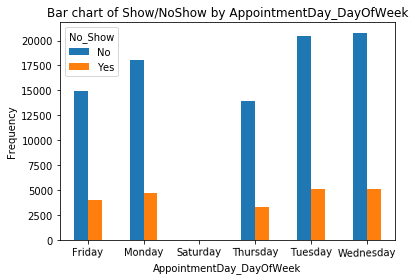

No_Show                          No       Yes
AppointmentDay_DayOfWeek                     
Friday                    13.555182  3.652534
Monday                    16.307475  4.243345
Saturday                   0.027143  0.008143
Thursday                  12.584369  3.020104
Tuesday                   18.536815  4.661347
Wednesday                 18.795578  4.607966 



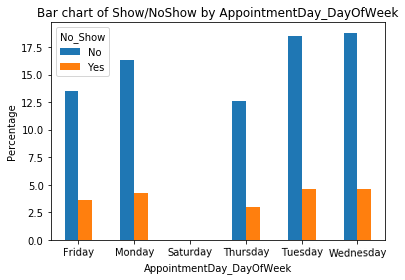

In [48]:
print(pd.crosstab(df.AppointmentDay_DayOfWeek, df.No_Show))

pd.crosstab(df.AppointmentDay_DayOfWeek, df.No_Show).plot(kind = 'bar', title = 'Bar chart of Show/NoShow by AppointmentDay_DayOfWeek', rot = 1)
plt.ylabel('Frequency')
plt.show();

crosstabAppointmentDay_DayOfWeek=pd.crosstab(df.AppointmentDay_DayOfWeek, df.No_Show)

print(crosstabAppointmentDay_DayOfWeek/crosstabAppointmentDay_DayOfWeek.sum().sum()*100, '\n')

cr = crosstabAppointmentDay_DayOfWeek/crosstabAppointmentDay_DayOfWeek.sum().sum()*100
cr.plot(kind = 'bar', title = 'Bar chart of Show/NoShow by AppointmentDay_DayOfWeek', rot = 1)
plt.ylabel('Percentage')
plt.show();

> **Remark:** From the visualization above, we do not see a clear pattern in the patients visits based on the week day. But we can observe that on Saturday's the percentage of visits is zero. So, AppointmentDay_DOW could help us in predicting the visits by a small number.

<a id='conclusions'></a>
## Conclusions

>From the analysis carried out above, two new variables where created which were AppointmentDay_DayOfWeek and ScheduledDay_DayOfWeek. This variable where created to identify the actual day which a patient scheduled for their appointment and the acutal they were go for their appointment. Almost all the varialbe considerd could help us in determing if a paitent would show up for their appointment or not.

>Some of the limitation from the data are; most of the variables where not properly explained. for example variable like sms_recieved and handicap.

> the resources I used for this project where numpy and pandas documentation and a post on [kaggle platform](https://www.kaggle.com/samratp/predict-show-noshow-eda-visualization-model/comments)